In [54]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.metrics import roc_curve, roc_auc_score, classification_report, accuracy_score, confusion_matrix 
import seaborn as sns
import matplotlib.pyplot as plt

In [55]:
df = pd.read_csv(r'C:\Users\admin\Downloads\ehrdata.csv')

In [56]:
df.head()

,HAEMATOCRIT,HAEMOGLOBINS,ERYTHROCYTE,LEUCOCYTE,THROMBOCYTE,MCH,MCHC,AGE,SEX,SOURCE,MCV
0,35.1,11.8,4.65,6.3,310,25.4,33.6,1,F,out,75.5
1,43.5,14.8,5.39,12.7,334,27.5,34.0,1,F,out,80.7
2,33.5,11.3,4.74,13.2,305,23.8,33.7,1,F,out,70.7
3,39.1,13.7,4.98,10.5,366,27.5,35.0,1,F,out,78.5
4,30.9,9.9,4.23,22.1,333,23.4,32.0,1,M,out,73.0


In [57]:
df.isnull().sum()

HAEMATOCRIT     0
HAEMOGLOBINS    0
ERYTHROCYTE     0
LEUCOCYTE       0
THROMBOCYTE     0
MCH             0
MCHC            0
AGE             0
SEX             0
SOURCE          0
MCV             0
dtype: int64

In [58]:
df.shape

(4412, 11)

In [59]:
df.describe()

,HAEMATOCRIT,HAEMOGLOBINS,ERYTHROCYTE,LEUCOCYTE,THROMBOCYTE,MCH,MCHC,AGE,MCV
count,4412.000000,4412.000000,4412.000000,4412.000000,4412.000000,4412.000000,4412.000000,4412.000000,4412.000000
mean,38.197688,12.741727,4.541260,8.718608,257.524479,28.234701,33.343042,46.626473,84.612942
std,5.974784,2.079903,0.784091,5.049041,113.972365,2.672639,1.228664,21.731218,6.859101
min,13.700000,3.800000,1.480000,1.100000,8.000000,14.900000,26.000000,1.000000,54.000000
25%,34.375000,11.400000,4.040000,5.675000,188.000000,27.200000,32.700000,29.000000,81.500000
50%,38.600000,12.900000,4.570000,7.600000,256.000000,28.700000,33.400000,47.000000,85.400000
75%,42.500000,14.200000,5.050000,10.300000,321.000000,29.800000,34.100000,64.000000,88.700000
max,69.000000,18.900000,7.860000,76.600000,1183.000000,40.800000,39.000000,99.000000,115.600000


In [60]:
df["SOURCE"].value_counts()

out    2628
in     1784
Name: SOURCE, dtype: int64

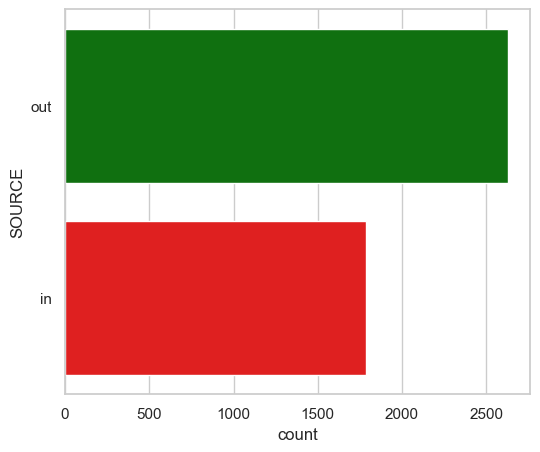

In [61]:
plt.figure(figsize=(6,5))
sns.countplot(data=df,y="SOURCE",palette=["green","red"])
plt.show()

In [62]:
df["SEX"].value_counts()

M    2290
F    2122
Name: SEX, dtype: int64

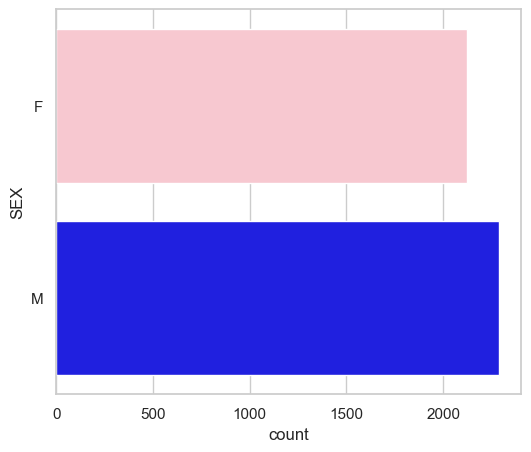

In [63]:
plt.figure(figsize=(6,5))
sns.countplot(data=df,y="SEX",palette=["pink","blue"])
plt.show()

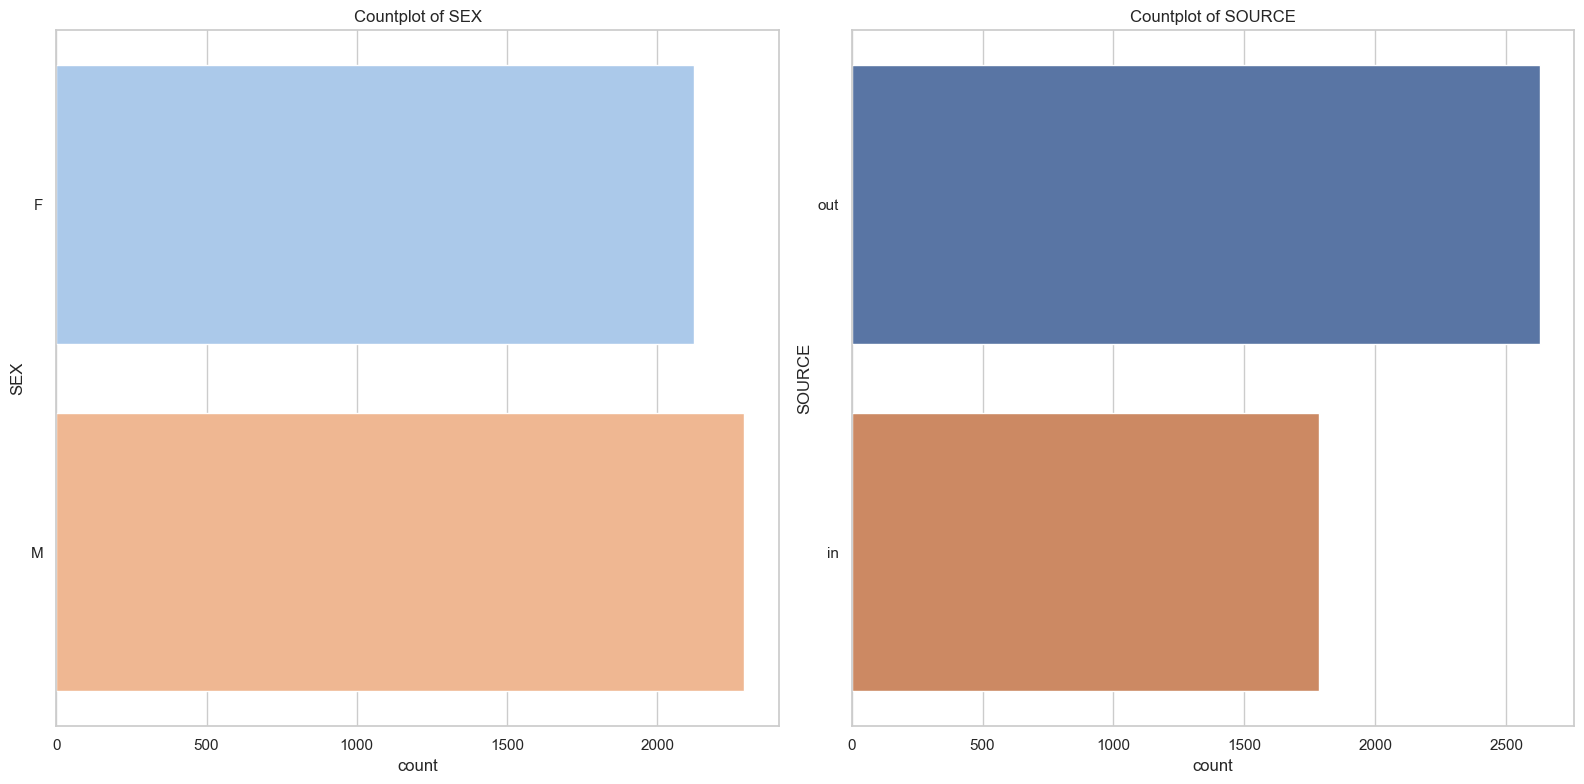

In [64]:
columns = ['SEX', 'SOURCE']
palettes = ['pastel', 'deep']

sns.set(style="whitegrid")

# Create subplots
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(16, 8))

axes = axes.flatten()
for i, (col, palette) in enumerate(zip(columns, palettes)):
    sns.countplot(y=col, data=df, ax=axes[i], palette=palette)
    axes[i].set_title(f'Countplot of {col}')

plt.tight_layout()
plt.show()

In [65]:
from sklearn.preprocessing import LabelEncoder

categorical_columns = ['SOURCE','SEX', 'AGE']
label_encoder = LabelEncoder()

for col in categorical_columns:
    df[col] = label_encoder.fit_transform(df[col])


df.head()

,HAEMATOCRIT,HAEMOGLOBINS,ERYTHROCYTE,LEUCOCYTE,THROMBOCYTE,MCH,MCHC,AGE,SEX,SOURCE,MCV
0,35.1,11.8,4.65,6.3,310,25.4,33.6,0,0,1,75.5
1,43.5,14.8,5.39,12.7,334,27.5,34.0,0,0,1,80.7
2,33.5,11.3,4.74,13.2,305,23.8,33.7,0,0,1,70.7
3,39.1,13.7,4.98,10.5,366,27.5,35.0,0,0,1,78.5
4,30.9,9.9,4.23,22.1,333,23.4,32.0,0,1,1,73.0


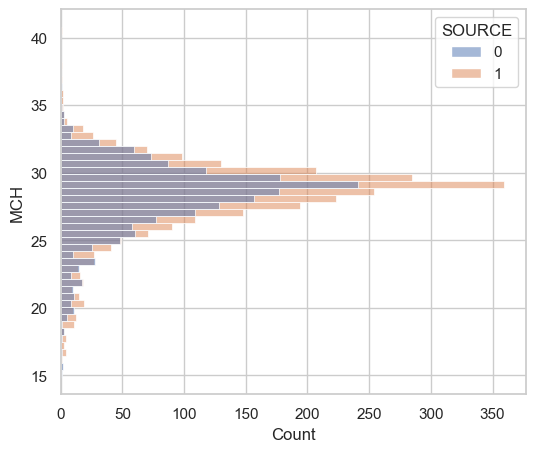

In [66]:
plt.figure(figsize=(6,5))
sns.histplot(data=df, y="MCH",hue="SOURCE",bins=50)
plt.show()

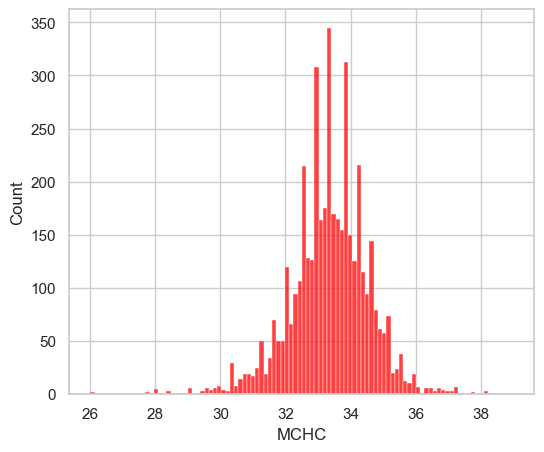

In [67]:
plt.figure(figsize=(6,5))
sns.histplot(data=df, x="MCHC",bins=100,color="red")
plt.show()

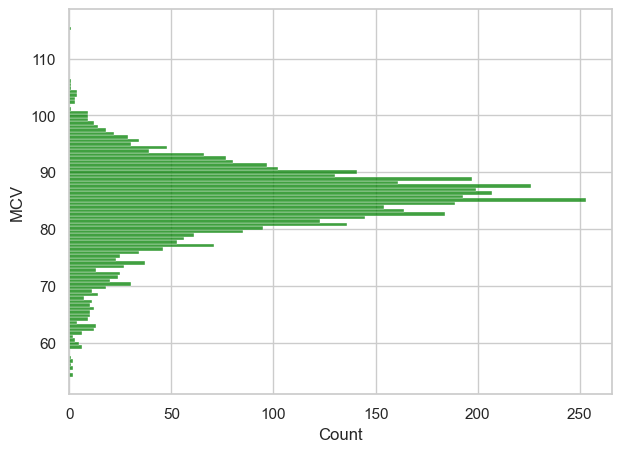

In [68]:
plt.figure(figsize=(7,5))
sns.histplot(data=df, y="MCV",bins=100,color="green")
plt.show()

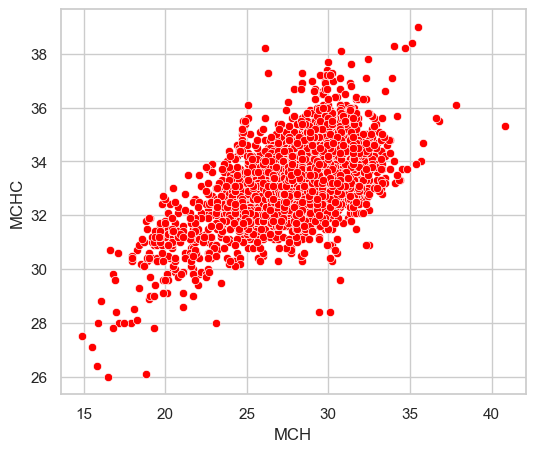

In [69]:
plt.figure(figsize=(6,5))
sns.scatterplot(data=df, x="MCH", y="MCHC",color="red")
plt.show()

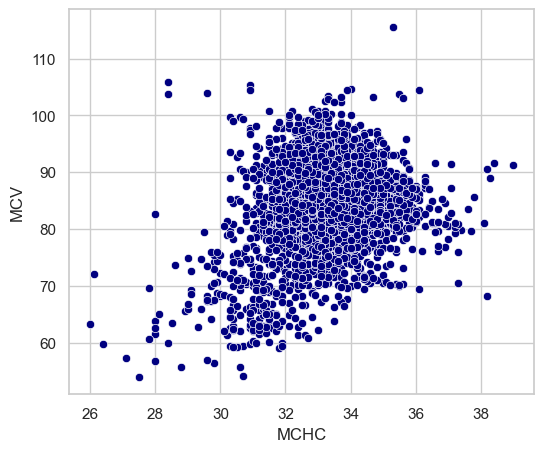

In [70]:
plt.figure(figsize=(6,5))
sns.scatterplot(data=df, x="MCHC", y="MCV",color="navy")
plt.show()

In [71]:
X = df.drop(columns=['SEX'])
y = df['SEX']

In [72]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [73]:
from sklearn.ensemble import GradientBoostingClassifier
first_model= GradientBoostingClassifier(n_estimators=100, learning_rate=1.0,max_depth=10,
                                 random_state=42)

In [74]:
first_model.fit(X_train,y_train)
pred0=first_model.predict(X_test)

In [75]:
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
accuracy = accuracy_score(y_test,pred0)
print(f'Accuracy: {accuracy:.2f}')

Accuracy: 0.75


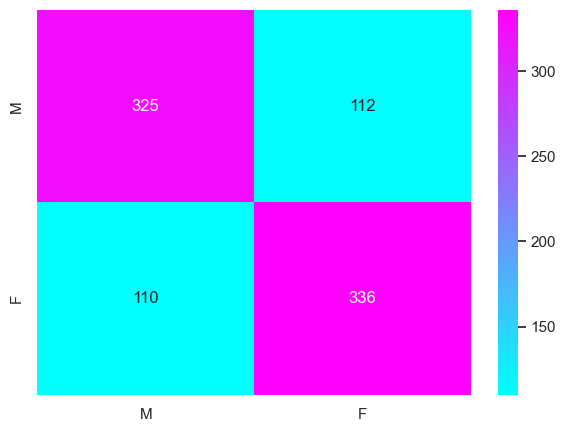

In [76]:
plt.figure(figsize=(7,5))
label_name=["M","F"]
conf_matrix = confusion_matrix(y_test, pred0)
sns.heatmap(conf_matrix,annot=True,fmt="d",xticklabels=label_name,yticklabels=label_name
            ,cmap="cool")
plt.show()

In [31]:
print(classification_report(y_test,pred0,target_names=label_name))

              precision    recall  f1-score   support

           M       0.75      0.74      0.75       437
           F       0.75      0.75      0.75       446

    accuracy                           0.75       883
   macro avg       0.75      0.75      0.75       883
weighted avg       0.75      0.75      0.75       883



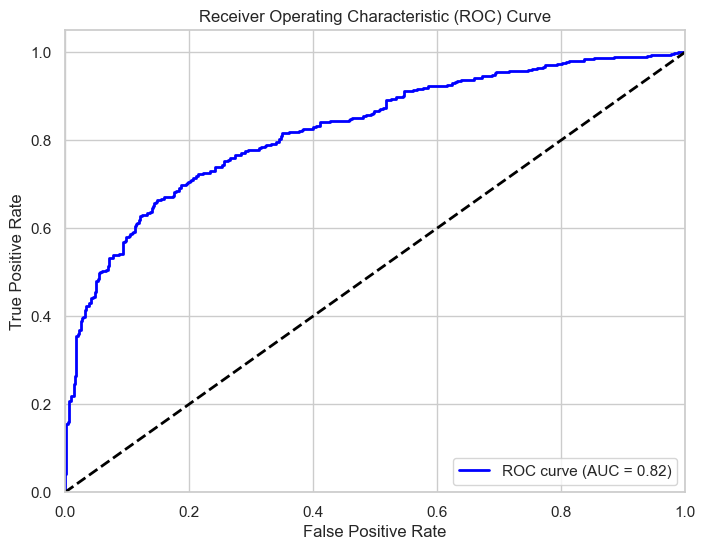

In [77]:
from sklearn.metrics import roc_curve, roc_auc_score
y_pred_prob = first_model.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
roc_auc = roc_auc_score(y_test, y_pred_prob)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='black', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

In [78]:
data={"True_Data":y_test,"Test_Data":pred0}
new=pd.DataFrame(data)
new.head(20)

,True_Data,Test_Data
2447,1,1
2422,1,1
3973,0,0
1726,0,0
144,1,0
2123,0,1
3470,0,0
2456,1,0
3677,1,0
2580,0,1


In [79]:
from sklearn.metrics import log_loss
loss = log_loss(y_test,pred0)
print(f'Log Loss: {loss:.4f}')

Log Loss: 8.6837


In [80]:
from sklearn.neighbors import KNeighborsClassifier
sec_model = KNeighborsClassifier(n_neighbors=5, metric='minkowski', p=2 )

In [81]:
sec_model.fit(X_train,y_train)

KNeighborsClassifier()

In [82]:
pred1=sec_model.predict(X_test)

C:\Users\admin\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


In [83]:
accuracy1 = accuracy_score(y_test,pred1)
print(f'Accuracy: {accuracy1:.2f}')

Accuracy: 0.64


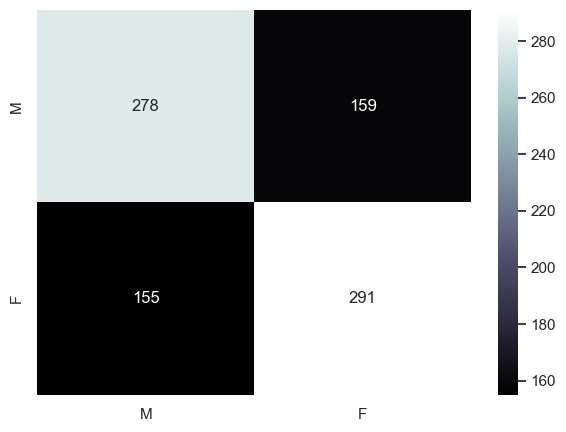

In [84]:
plt.figure(figsize=(7,5))
label_name=["M","F"]
conf_matrix1 = confusion_matrix(y_test, pred1)
sns.heatmap(conf_matrix1,annot=True,fmt="d",xticklabels=label_name,yticklabels=label_name
            ,cmap="bone")
plt.show()

In [85]:
print(classification_report(y_test,pred1,target_names=label_name))

              precision    recall  f1-score   support

           M       0.64      0.64      0.64       437
           F       0.65      0.65      0.65       446

    accuracy                           0.64       883
   macro avg       0.64      0.64      0.64       883
weighted avg       0.64      0.64      0.64       883



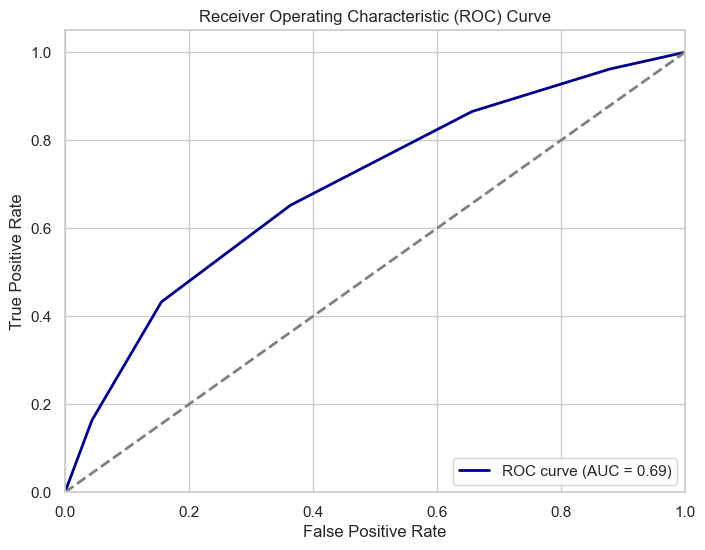

In [86]:
y_pred_prob1 = sec_model.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob1)
roc_auc0 = roc_auc_score(y_test, y_pred_prob1)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkblue', lw=2, label=f'ROC curve (AUC = {roc_auc0:.2f})')
plt.plot([0, 1], [0, 1], color='gray', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

In [87]:
from sklearn.metrics import log_loss
loss0 = log_loss(y_test,pred1)
print(f'Log Loss: {loss0:.4f}')

Log Loss: 12.2823


In [88]:
from sklearn.ensemble import RandomForestClassifier
third_model=RandomForestClassifier(max_depth=5, random_state=42)

In [89]:
third_model.fit(X_train,y_train)

RandomForestClassifier(max_depth=5, random_state=42)

In [90]:
pred2=third_model.predict(X_test)
accuracy2 = accuracy_score(y_test,pred2)
print(f'Accuracy: {accuracy2:.2f}')

Accuracy: 0.71


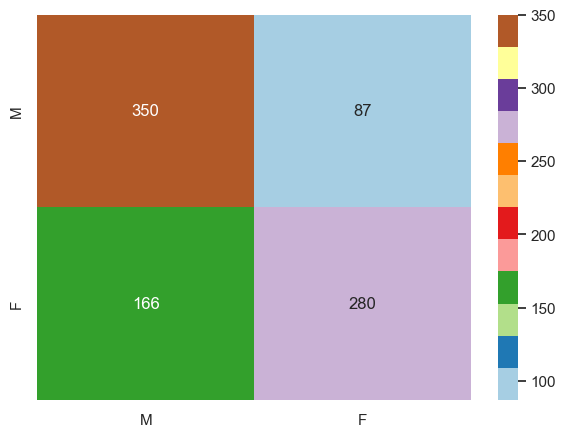

In [91]:
plt.figure(figsize=(7,5))
label_name=["M","F"]
conf_matrix2 = confusion_matrix(y_test, pred2)
sns.heatmap(conf_matrix2,annot=True,fmt="d",xticklabels=label_name,yticklabels=label_name
            ,cmap="Paired")
plt.show()

In [92]:
print(classification_report(y_test,pred2,target_names=label_name))

              precision    recall  f1-score   support

           M       0.68      0.80      0.73       437
           F       0.76      0.63      0.69       446

    accuracy                           0.71       883
   macro avg       0.72      0.71      0.71       883
weighted avg       0.72      0.71      0.71       883



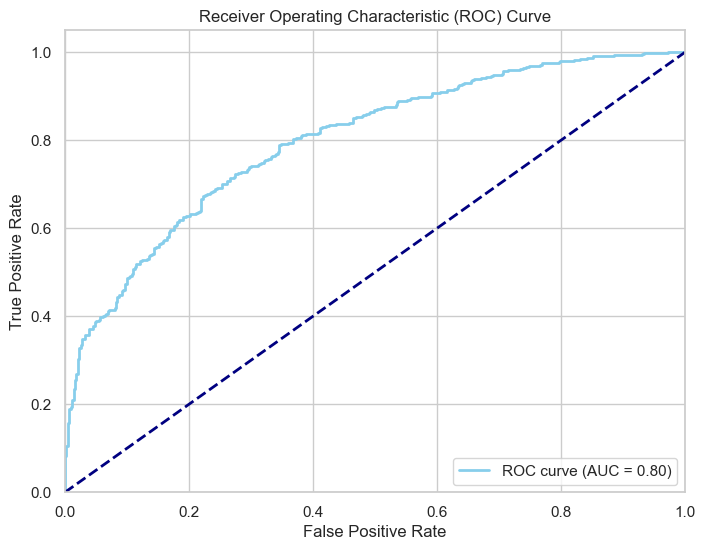

In [94]:
y_pred_prob2 = third_model.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob2)
roc_auc0 = roc_auc_score(y_test, y_pred_prob2)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='skyblue', lw=2, label=f'ROC curve (AUC = {roc_auc0:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

In [95]:
loss2= log_loss(y_test,pred2)
print(f'Log Loss: {loss2:.4f}')

Log Loss: 9.8962


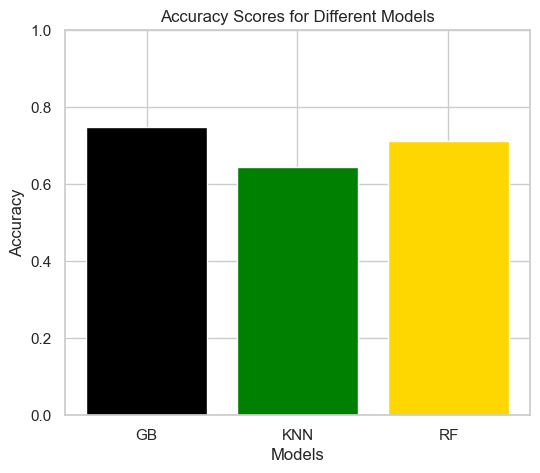

In [96]:
models = ['GB', 'KNN', 'RF']
accuracy_scores = [accuracy, accuracy1, accuracy2]

plt.figure(figsize=(6,5))
plt.bar(models, accuracy_scores, color=['black', 'green', 'gold'])
plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.title('Accuracy Scores for Different Models')
plt.ylim(0, 1)
plt.show()

In [97]:
models_loss = ['GB_Loss', 'KNN_Loss', 'RF_Loss']
loss_scores = [loss, loss0, loss2]
df_loss = pd.DataFrame({'Models': models_loss, 'Loss': loss_scores})
df_loss

,Models,Loss
0,GB_Loss,8.683690
1,KNN_Loss,12.282336
2,RF_Loss,9.896240
